# Export d2go model trained in coco2017 to torchscript_int8

This notebook creates a d2go model for use in the [flutter_d2go](https://pub.dev/packages/flutter_d2go) [example app](https://github.com/tsubauaaa/flutter_d2go/tree/master/example). The d2go models created in this notebook can be used in [flutter_d2go](https://pub.dev/packages/flutter_d2go).

## Confirmation of torch environment
Assumes torch 1.11.0+cu113 on Google Colab Pro as of July 2022

In [1]:
!python -c 'import torch; print(torch.__version__, torch.cuda.is_available())'

1.11.0+cu113 True


## Installation

### Install detectron2
Restart the runtime when install is finished.

In [2]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-p6dbs3g7
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-p6dbs3g7
     |████████████████████████████████| 50 kB 3.9 MB/s 
     |████████████████████████████████| 79 kB 9.2 MB/s 
     |████████████████████████████████| 151 kB 70.2 MB/s 
     |████████████████████████████████| 1.4 MB 63.6 MB/s 
     |████████████████████████████████| 431 kB 70.6 MB/s 
     |████████████████████████████████| 248 kB 73.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 96 kB 6.9 MB/s 
     |████████████████████████████████| 843 kB 66.5 MB/s 
     |████████████████████████████████| 596 kB 71.5 MB/s 
     |████████

### Install mobile-vision

In [1]:
!pip install 'git+https://github.com/facebookresearch/mobile-vision.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/mobile-vision.git to /tmp/pip-req-build-7b0lv8ib
  Running command git clone -q https://github.com/facebookresearch/mobile-vision.git /tmp/pip-req-build-7b0lv8ib
     |████████████████████████████████| 44 kB 2.4 MB/s 
  Created wheel for mobile-cv: filename=mobile_cv-0.1-py3-none-any.whl size=244088 sha256=72f6176ea857189852505bd2eb567948077fa7c387f733e1a7ab3873e9e1f844
  Stored in directory: /tmp/pip-ephem-wheel-cache-f3wtazh_/wheels/a1/cd/50/a0ceb1cce88c16740b4d782a587c1d21f79a8f9567129919bf
Successfully built mobile-cv


### Install d2go

In [2]:
!git clone https://github.com/facebookresearch/d2go.git
%cd d2go
!pip install .
%cd /content

Cloning into 'd2go'...
remote: Enumerating objects: 3352, done.
remote: Counting objects: 100% (208/208), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 3352 (delta 107), reused 179 (delta 96), pack-reused 3144
Receiving objects: 100% (3352/3352), 2.73 MiB | 9.03 MiB/s, done.
Resolving deltas: 100% (2270/2270), done.
/content/d2go
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/d2go
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Cloning https://github.com/PyTorchLightning/pytorch-lightning (to revision 9b011606f) to /tmp/pip-install-cxibdj35/pytorc

## Inference with Pre-trained Models

In this section, we will show how to load pretrained models using d2go model_zoo API, and how to make predictions with d2go models and visualize the output. 

- First import the model zoo API from d2go and get a pretrained Keypoint R-CNN model with FBNetV3 backbone

In [3]:
!cp -pr d2go/configs /usr/local/lib/python3.7/dist-packages/d2go/

If, at runtime, you get the following error in d2go/runner/api.py

```
ImportError: cannot import name 'final' from 'typing' (/usr/lib/python3.7/typing.py)```

Please take the following actions.
- Comment out lines 4 and 17 of d2go/runner/api.py

In [5]:
from d2go.model_zoo import model_zoo
model = model_zoo.get("keypoint_rcnn_fbnetv3a_dsmask_C4.yaml", trained=True)

INFO:d2go.modeling.backbone.fbnet_v2:Using un-unified arch_def for ARCH "FBNetV3_A_dsmask" (without scaling):
trunk
- [('conv_k3', 16, 2, 1), ('ir_k3', 16, 1, 1, {'expansion': 1}, {'less_se_channels': False})]
- [('ir_k5', 32, 2, 1, {'expansion': 4}, {'less_se_channels': False}), ('ir_k5', 32, 1, 1, {'expansion': 2}, {'less_se_channels': False})]
- [('ir_k5', 40, 2, 1, {'expansion': 4}, {'less_se_channels': False}), ('ir_k3', 40, 1, 3, {'expansion': 3}, {'less_se_channels': False})]
- [('ir_k5', 72, 2, 1, {'expansion': 4}, {'less_se_channels': False}), ('ir_k3', 72, 1, 3, {'expansion': 3}, {'less_se_channels': False}), ('ir_k5', 112, 1, 1, {'expansion': 4}, {'less_se_channels': False}), ('ir_k5', 112, 1, 3, {'expansion': 4}, {'less_se_channels': False})]
rpn
- [('ir_k5', 112, 1, 3, {'expansion': 4}, {'less_se_channels': False})]
bbox
- [('ir_k3', 128, 2, 1, {'expansion': 4}), ('ir_k3', 128, 1, 2, {'expansion': 6}), ('ir_k3', 160, 1, 1, {'expansion': 6})]
mask
- [('ir_k3', 128, 2, 1, {'

- Download an image from the COCO dataset:

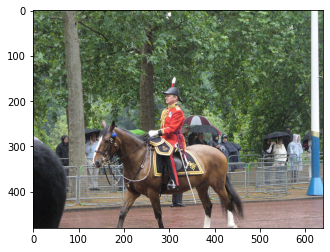

In [6]:
import cv2
from matplotlib import pyplot as plt
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

- Then we can create a `DemoPredictor` to run inference on this image and see the raw outputs:

In [7]:
from d2go.utils.demo_predictor import DemoPredictor
predictor = DemoPredictor(model)
outputs = predictor(im)
# the output object categories and corresponding bounding boxes
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)
print(outputs["instances"].pred_keypoints)
print(outputs["instances"].pred_keypoint_heatmaps)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
Boxes(tensor([[2.7415e+02, 1.6022e+02, 3.4086e+02, 3.9926e+02],
        [4.9970e+01, 2.7770e+02, 8.2255e+01, 3.5339e+02],
        [4.6935e-01, 2.8680e+02, 7.9896e+01, 4.7831e+02],
        [1.4570e+02, 2.6459e+02, 1.9175e+02, 3.9124e+02],
        [1.1634e+02, 2.7035e+02, 1.4294e+02, 3.4521e+02],
        [5.6695e+02, 2.6758e+02, 5.9406e+02, 3.3537e+02],
        [3.0651e+02, 2.4411e+02, 4.5968e+02, 4.6216e+02],
        [4.2430e+02, 2.8094e+02, 4.5767e+02, 3.4627e+02],
        [2.8304e+02, 1.7793e+02, 3.9048e+02, 4.2389e+02],
        [5.9895e+02, 2.6694e+02, 6.2120e+02, 3.3928e+02],
        [3.9737e+02, 2.7134e+02, 4.2792e+02, 3.1577e+02],
        [5.8034e+02, 2.7163e+02, 5.9923e+02, 3.0660e+02],
        [4.0938e+02, 2.8630e+02, 4.3665e+02, 3.3320e+02]], device='cuda:0'))
tensor([[[2.9396e+02, 1.9757e+02, 4.2812e-01],
         [2.9813e+02, 1.9117e+02, 3.7760e-01],
         [2.9396e+02, 1.9330e+02, 5.4538e-01],
         [3.148

/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.7/dist-packages/detectron2/structures/keypoints.py:224: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  y_int = (pos - x_int) // w


- Let's visualize the output predictions

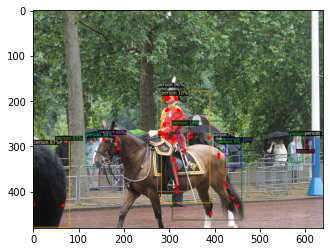

In [8]:
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get("coco_2017_train"))
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))

## Download and deploy coco2017 dataset

In [9]:
%cd /content

/content


In [10]:
!wget -q http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!mkdir -p /usr/local/lib/python3.7/dist-packages/d2go/datasets/coco
!unzip annotations_trainval2017.zip -d /usr/local/lib/python3.7/dist-packages/d2go/datasets/coco/

Archive:  annotations_trainval2017.zip
  inflating: /usr/local/lib/python3.7/dist-packages/d2go/datasets/coco/annotations/instances_train2017.json  
  inflating: /usr/local/lib/python3.7/dist-packages/d2go/datasets/coco/annotations/instances_val2017.json  
  inflating: /usr/local/lib/python3.7/dist-packages/d2go/datasets/coco/annotations/captions_train2017.json  
  inflating: /usr/local/lib/python3.7/dist-packages/d2go/datasets/coco/annotations/captions_val2017.json  
  inflating: /usr/local/lib/python3.7/dist-packages/d2go/datasets/coco/annotations/person_keypoints_train2017.json  
  inflating: /usr/local/lib/python3.7/dist-packages/d2go/datasets/coco/annotations/person_keypoints_val2017.json  


In [11]:
!wget -q http://images.cocodataset.org/zips/train2017.zip
!unzip train2017.zip -d /usr/local/lib/python3.7/dist-packages/d2go/datasets/coco/

ストリーミング出力は最後の 5000 行に切り捨てられました。
 extracting: /usr/local/lib/python3.7/dist-packages/d2go/datasets/coco/train2017/000000259556.jpg  
 extracting: /usr/local/lib/python3.7/dist-packages/d2go/datasets/coco/train2017/000000381931.jpg  
 extracting: /usr/local/lib/python3.7/dist-packages/d2go/datasets/coco/train2017/000000569592.jpg  
 extracting: /usr/local/lib/python3.7/dist-packages/d2go/datasets/coco/train2017/000000229396.jpg  
 extracting: /usr/local/lib/python3.7/dist-packages/d2go/datasets/coco/train2017/000000488990.jpg  
 extracting: /usr/local/lib/python3.7/dist-packages/d2go/datasets/coco/train2017/000000348684.jpg  
 extracting: /usr/local/lib/python3.7/dist-packages/d2go/datasets/coco/train2017/000000234031.jpg  
 extracting: /usr/local/lib/python3.7/dist-packages/d2go/datasets/coco/train2017/000000563584.jpg  
 extracting: /usr/local/lib/python3.7/dist-packages/d2go/datasets/coco/train2017/000000276069.jpg  
 extracting: /usr/local/lib/python3.7/dist-packages/d2go/datasets/co

## Export d2go model trained in coco2017 to torchscript_int8

In [12]:
!cd /usr/local/lib/python3.7/dist-packages/d2go/ && d2go.exporter --config-file configs/keypoint_rcnn_fbnetv3a_dsmask_C4.yaml --predictor-type torchscript_int8@tracing --output-dir ./ MODEL.WEIGHTS https://mobile-cv.s3-us-west-2.amazonaws.com/d2go/models/250430934/model_0389999.pth

INFO:d2go.setup:Namespace(compare_accuracy=False, config_file='configs/keypoint_rcnn_fbnetv3a_dsmask_C4.yaml', device='cpu', opts=['MODEL.WEIGHTS', 'https://mobile-cv.s3-us-west-2.amazonaws.com/d2go/models/250430934/model_0389999.pth'], output_dir='./', predictor_types=['torchscript_int8@tracing'], runner='d2go.runner.GeneralizedRCNNRunner', save_return_file=None, skip_if_fail=False)
Loaded config file configs/keypoint_rcnn_fbnetv3a_dsmask_C4.yaml:
MODEL:
  META_ARCHITECTURE: "GeneralizedRCNN"
  KEYPOINT_ON: True
  MASK_ON: False
  # WEIGHTS: manifold://xiaoliangdai_model/tree/xiaoliangdai/20210126/faster_rcnn.ULfbyCBZtx/e2e_train/model_0179999.pth
  FBNET_V2:
    ARCH: "FBNetV3_A_dsmask"
    NORM: "naiveSyncBN"
    WIDTH_DIVISOR: 8
    SCALE_FACTOR: 0.75
  BACKBONE:
    NAME: FBNetV2C4Backbone
  ANCHOR_GENERATOR:
    # SIZES: [[32, 64, 128, 256, 512]]  # NOTE: for smaller resolution (320 < 512)
    SIZES: [[32, 64, 96, 128, 160]]  # NOTE: for smaller resolution (320 < 512)
  RPN:
    

In [13]:
from typing import List, Dict
import torch
from torch.utils.mobile_optimizer import optimize_for_mobile
import os

predictor_path = "/usr/local/lib/python3.7/dist-packages/d2go/torchscript_int8@tracing/"

class Wrapper(torch.nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model
        coco_idx_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                            27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51,
                            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77,
                            78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91]
        self.coco_idx = torch.tensor(coco_idx_list)

    def forward(self, inputs: List[torch.Tensor]):
        x = inputs[0].unsqueeze(0) * 255
        scale = 320.0 / min(x.shape[-2], x.shape[-1])
        x = torch.nn.functional.interpolate(x, scale_factor=scale, mode="bilinear", align_corners=True, recompute_scale_factor=True)
        out = self.model(x[0])
        res : Dict[str, torch.Tensor] = {}
        res["boxes"] = out[0] / scale
        res["labels"] = torch.index_select(self.coco_idx, 0, out[1])
        res["keypoint_heatmaps"] = out[2]
        res["keypoints"] = out[3]
        res["scores"] = out[4]
        return inputs, [res]

orig_model = torch.jit.load(os.path.join(predictor_path, "model.jit"))
wrapped_model = Wrapper(orig_model)
scripted_model = torch.jit.script(wrapped_model)
# scripted_model.save("d2go_kp.pt")
optimized_scripted_module = optimize_for_mobile(scripted_model)
optimized_scripted_module._save_for_lite_interpreter("d2go_kp.ptl")